<a href="https://colab.research.google.com/github/castillosebastian/research_tools/blob/master/TPFinal_AnalisisyProyeccionVentas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Final - Aprendizaje Automático, UTN-Paraná, 2021
# Prof.Dr. Franco Ronchetti

## Título: 
**"Análisis y proyección de Ventas en XXX"**
## Alumnos:  
  - Cívico Sergio 
  - Shai Blejar
  - Castillo Claudio Sebastian

# Presentación del Dataset de análisis

In [1]:
# Libraries, tools and thanks 
import bs4
import io
import requests
from google.colab import drive
import json

In [2]:
# data wrangling
import pandas as pd
import numpy as np
import os
import nltk

# EDA
from dataprep.eda import create_report
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.preprocessing import StandardScaler

import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

# initialize some package settings
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)
%matplotlib inline

NumExpr defaulting to 2 threads.
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd  'drive/My Drive/Colab Notebooks/data'

/content/drive/My Drive/Colab Notebooks/data


In [5]:
%ls

corpus_fallosmetdat.json  Libro1.csv     sales2021.csv    tbfallos.json
corpus_textosfallos.json  sales2020.csv  tbdoctrina.json  tbmetdat.json


In [6]:
sales2020 = pd.read_csv("sales2020.csv", sep= ";", header=0, encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,11,13,14,15,17,18,24,25,28,29,32,33,34,35,36,41,42,45,48,53,54,56,57,60,70) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
sales2020.shape

(226159, 71)

In [11]:
sales2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226159 entries, 0 to 226158
Data columns (total 71 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   db_source         226159 non-null  int64  
 1   so_order_no       226159 non-null  object 
 2   so_bo_suffix      153275 non-null  object 
 3   so_cust_code      226159 non-null  object 
 4   so_order_date     226159 non-null  object 
 5   so_delivery_date  226159 non-null  object 
 6   MTH               226159 non-null  int64  
 7   WEEK              226159 non-null  int64  
 8   WEEKDAY           226159 non-null  int64  
 9   DAY               226159 non-null  object 
 10  FISCAL YEAR       226159 non-null  object 
 11  YEAR              226159 non-null  object 
 12  delivery_date     226159 non-null  object 
 13  order_packages    226159 non-null  object 
 14  so_order_weight   226159 non-null  object 
 15  job_code          144652 non-null  object 
 16  so_order_status   22

In [8]:
sales2020.head()

,db_source,so_order_no,so_bo_suffix,so_cust_code,so_order_date,so_delivery_date,MTH,WEEK,WEEKDAY,DAY,FISCAL YEAR,YEAR,delivery_date,order_packages,so_order_weight,job_code,so_order_status,reason_code,order_type_code,so_whse_code,territory_code,STORE,so_cust_type,so_rep_code,tax_exemption_no,so_terms_disc,so_price_code,cust_reference,so_invoice_no,credit_note_no,so_invoice_date,processing_date,total_amount,total_tax_adj,shipped_tax_adj,total_charges,so_curr_code,so_user_id_code,so_order_source,spare_alpha2_2,tax_calc_level,so_store_id,so_terminal,so_operator_code,pos_process,so_dif_flag,so_document_no,so_bo_suffix2,sol_line_seq,reorder_buyer,stk_description,stk_desc_line_2,stk_desc_line_3,sol_ordered_qty,sol_line_amount,stk_description3,stock_code,stock_code4,sys_description,stk_stock_status,stock_group,Status,Sales no GST,Month Proc,rep,STATE,Year proc,returns,Month proc2,Reord_buy_Cat,Subcategory
0,1,940206,NaN,215124,23/12/2020,1/7/2021,12,26,3,miércoles,2020-2021,2020,0/1/1900,1,0,NaN,11,NaN,NaN,5300,200,SG & JL NSW Warehouse,R,999,NaN,NaN,R0,914475,940206,0,12/7/2021,12/7/2021,48,0,0,0,NaN,lisah,S,M,L,NaN,0,NaN,29/6/2021 23:45,NaN,940206,NaN,1,7,SERVICE -,CUSTOMER ERROR,NaN,1,0,SERVICE -,SERVICECUSTERR,SERVICECUSTERR,SG & JL Delivery Charges,Z,ZSER,Backorder,0.000000,7,SG-JL-Office,NSW,2021,sale,7,Others,0
1,1,940206,NaN,215124,23/12/2020,1/7/2021,12,26,3,miércoles,2020-2021,2020,0/1/1900,1,0,NaN,11,NaN,NaN,5300,200,SG & JL NSW Warehouse,R,999,NaN,NaN,R0,914475,940206,0,12/7/2021,12/7/2021,48,0,0,0,NaN,lisah,S,M,L,NaN,0,NaN,29/6/2021 23:45,NaN,940206,NaN,2,39,JL Corfu,Cushion Cover Charcoal,45 x 45,-2,-40,JL Corfu,107CORFCUS45CHA,107CORFCUS45CHA,JL Homewares,S,12,Backorder,-36.363636,7,SG-JL-Office,NSW,2021,return,7,Homewares,Cushions & Throws
2,1,940206,NaN,215124,23/12/2020,1/7/2021,12,26,3,miércoles,2020-2021,2020,0/1/1900,1,0,NaN,11,NaN,NaN,5300,200,SG & JL NSW Warehouse,R,999,NaN,NaN,R0,914475,940206,0,12/7/2021,12/7/2021,48,0,0,0,NaN,lisah,S,M,L,NaN,0,NaN,29/6/2021 23:45,NaN,940206,NaN,4,39,JL Como,Cushion Cover Charcoal,58 x 58,2,88,JL Como,107NOOCUSC58CHA,107NOOCUSC58CHA,JL Homewares,S,12,Backorder,80.000000,7,SG-JL-Office,NSW,2021,sale,7,Homewares,Cushions & Throws
3,1,941576,AA,430584,26/12/2020,29/11/2021,12,26,6,sábado,2020-2021,2020,0/1/1900,2,0,NaN,11,NaN,NaN,2200,210,SG & JL Prospect,R,NaN,NaN,NaN,R0,NaN,941576,0,26/12/2020,0/1/1900,188.02,0,0,0,NaN,pos1210,3,M,L,1210,1,147,26/12/2020 04:00,NaN,941576,AA,16,27,SG Kimberley,Underbed Drawer White,(Set of 2),1,188.02,SG Kimberley,131KIMD2DRUNDWHI,131KIMD2DRUNDWHI,SG Bedroom Furniture,S,4051,Backorder,170.927273,1,Default-User,NSW,1900,sale,1,Others,0
4,1,941576,AA,430584,26/12/2020,29/11/2021,12,26,6,sábado,2020-2021,2020,0/1/1900,2,0,NaN,11,NaN,NaN,2200,210,SG & JL Prospect,R,NaN,NaN,NaN,R0,NaN,941576,0,26/12/2020,0/1/1900,188.02,0,0,0,NaN,pos1210,3,M,L,1210,1,147,26/12/2020 04:00,NaN,941576,AA,17,7,Delivery -,SG Weekday,NaN,1,0,Delivery -,YDELIVERYSMALL,YDELIVERYSMALL,SG & JL Delivery Charges,Z,YDCH,Backorder,0.000000,1,Default-User,NSW,1900,sale,1,Others,0


In [12]:
sales2020.so_order_date.value_counts()

26/12/2020    1966
28/6/2020     1835
27/6/2020     1706
21/6/2020     1631
29/11/2020    1620
              ... 
1/1/2020        33
25/4/2020       21
10/4/2020       15
25/12/2020      15
12/4/2020        8
Name: so_order_date, Length: 366, dtype: int64

In [18]:
sales2020["so_order_date"] = pd.to_datetime(sales2020["so_order_date"])

In [34]:
ts = sales2020['so_order_date'].value_counts().sort_index()

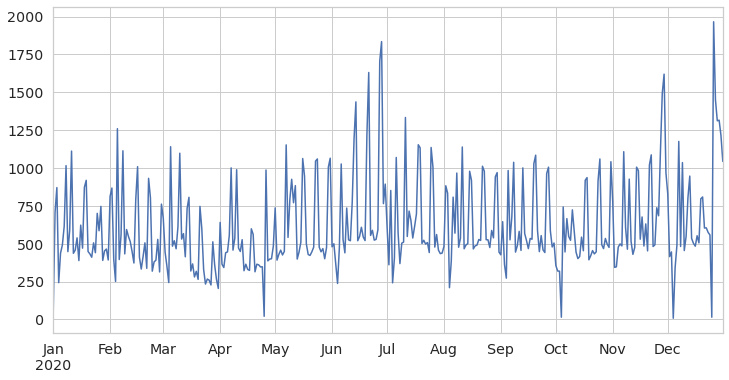

In [44]:
fig1, ax1 = plt.subplots(figsize=(12,6))
ts.plot()

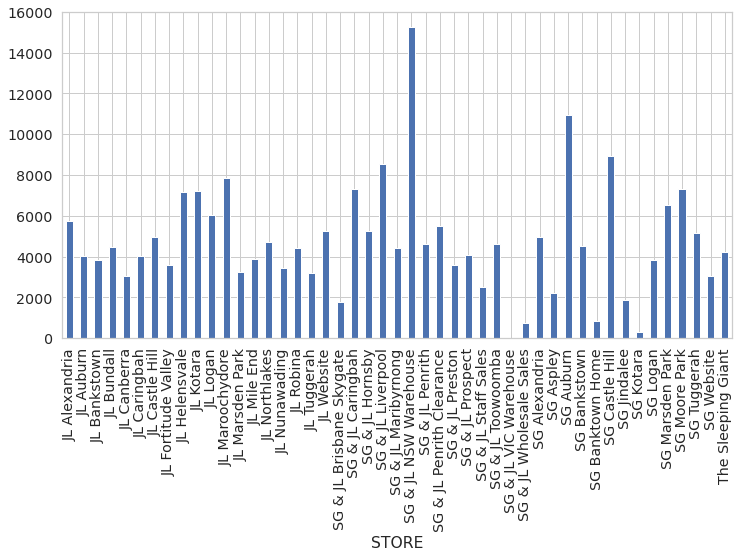

In [43]:
stores = sales2020.groupby(["STORE"]).size()
fig1, ax1 = plt.subplots(figsize=(12,6))
stores.plot.bar()

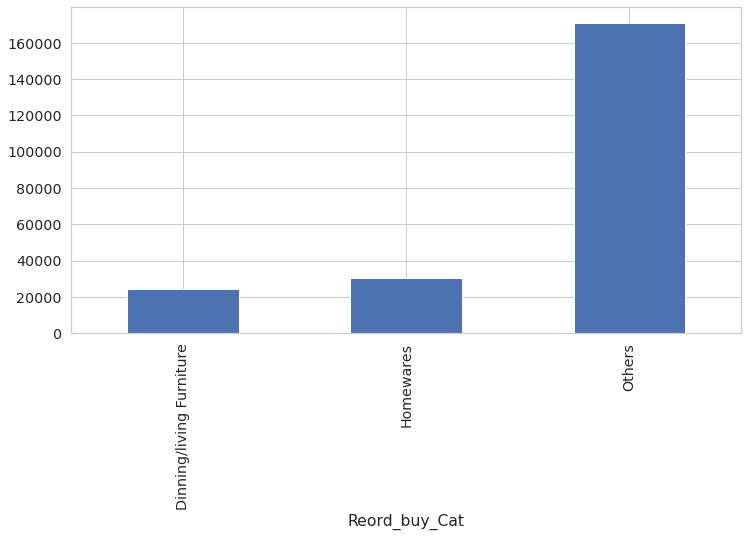

In [45]:
stores = sales2020.groupby(["Reord_buy_Cat"]).size()
fig1, ax1 = plt.subplots(figsize=(12,6))
stores.plot.bar()

In [65]:
sales2020.groupby('stock_group').size().reset_index(name='Count').sort_values(['Count'], ascending=False)

,stock_group,Count
93,YDCH,56987
17,1005,12000
51,4012,7844
0,10,7292
36,3015,7068
...,...,...
127,3035,1
121,3010,1
120,3009,1
99,ZWEB,1


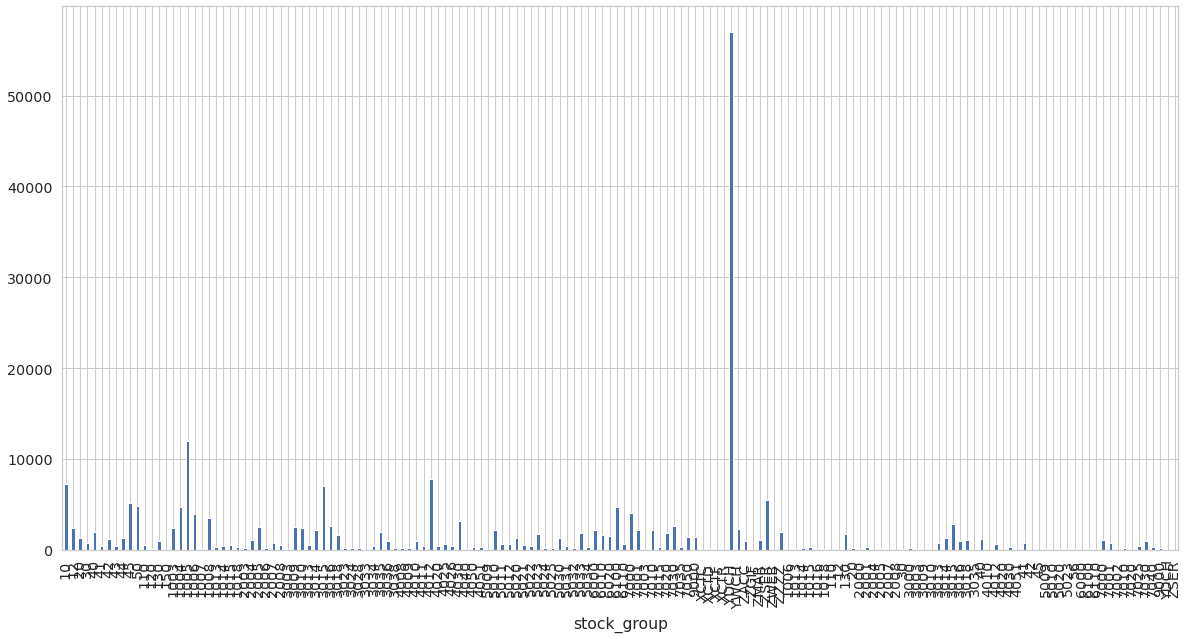

In [59]:
stores = sales2020.groupby(["stock_group"]).size()
fig1, ax1 = plt.subplots(figsize=(20,10))
stores.plot.bar()

# Formateamos y reducimos dataset

Propuesta

Dividimos tarea
  EDA
  Regresión
  Forecast

Formato de trabajo: jupyter 